In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [10]:
dataset = pd.read_csv('prices.csv',index_col="date",parse_dates=True)

In [11]:
print('Sample Data :')
dataset.head()

Sample Data :


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [12]:
dataset.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [14]:
dataset.isna().any()

symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 42.2+ MB


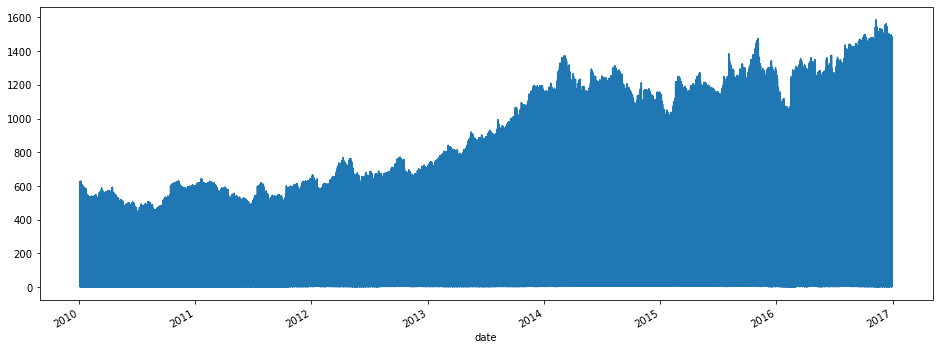

In [16]:
print('Opening Stock Market Graph')
dataset['open'].plot(figsize=(16,6))

Closing Stock Market Graph


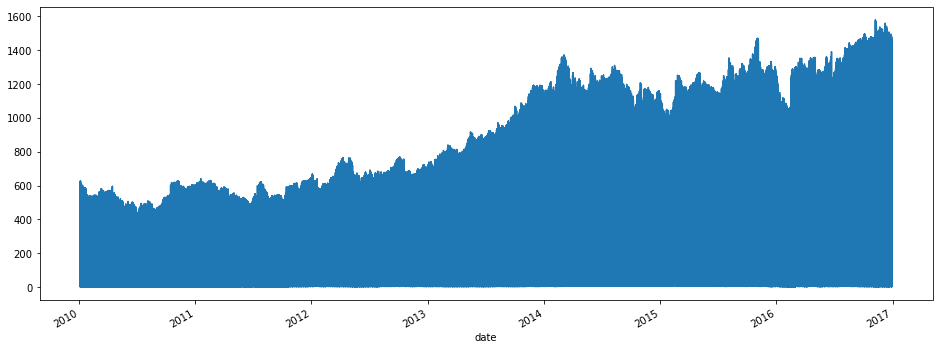

In [17]:
print('Closing Stock Market Graph')
dataset['close'].plot(figsize=(16,6))

In [20]:
dataset.rolling(7).mean().head(20)

,open,close,low,high,volume
date,,,,,
2016-01-05,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN,NaN
2016-01-12,NaN,NaN,NaN,NaN,NaN
2016-01-13,118.501429,117.251429,115.979999,119.918572,1.786000e+06
2016-01-14,117.084286,115.614286,114.228571,118.315714,1.589100e+06
2016-01-15,115.382858,114.550000,113.082856,116.792857,1.404429e+06


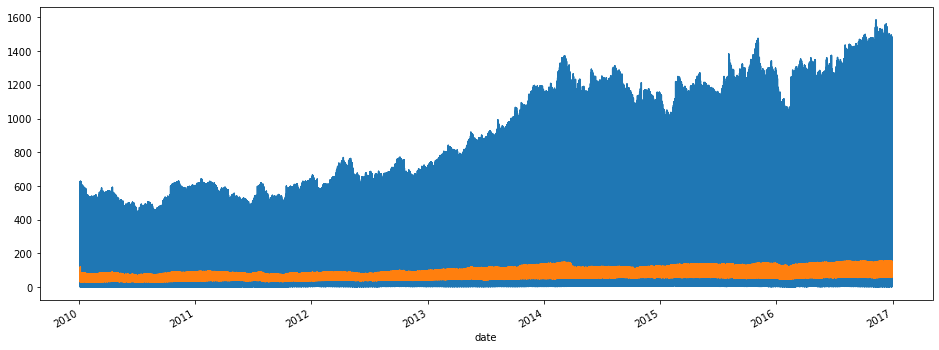

In [21]:
dataset['open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['close'].plot()

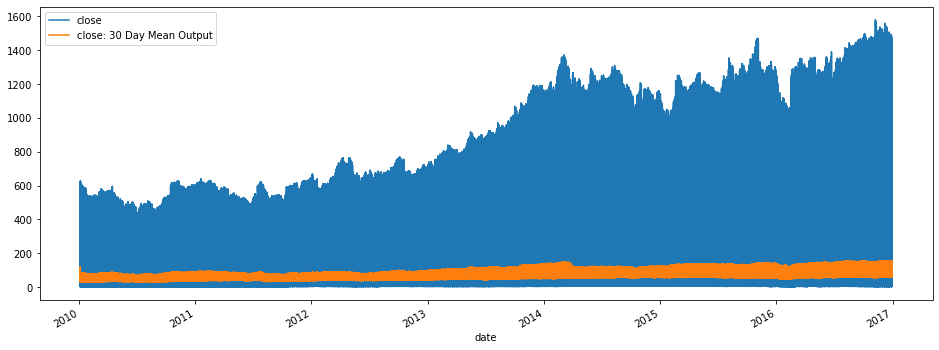

In [22]:
dataset['close: 30 Day Mean Output'] = dataset['close'].rolling(window=30).mean()
dataset[['close','close: 30 Day Mean Output']].plot(figsize=(16,6))

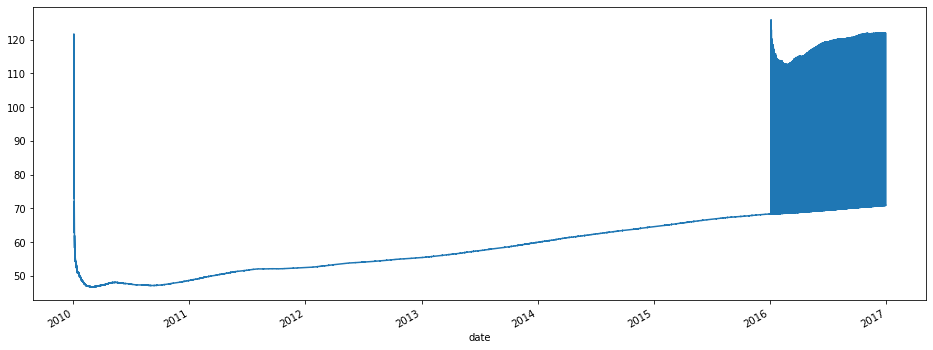

In [23]:
dataset['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [25]:
training_data_set=dataset['open']
training_data_set=pd.DataFrame(training_data_set)

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data_set)

In [28]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [33]:
regressor = Sequential()

NameError: name 'Sequential' is not defined

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

NameError: name 'regressor' is not defined

In [35]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

NameError: name 'regressor' is not defined

In [39]:
dataset_test = pd.read_csv('prices-split-adjusted.csv',index_col="date",parse_dates=True)

In [41]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [42]:
dataset_test.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [43]:
dataset_test.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [44]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 42.2+ MB


In [45]:
test_set=dataset_test['open']
test_set=pd.DataFrame(test_set)

In [46]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    851264 non-null  float64
dtypes: float64(1)
memory usage: 13.0 MB


In [47]:
dataset_total = pd.concat((dataset['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'regressor' is not defined

In [48]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

NameError: name 'predicted_stock_price' is not defined

NameError: name 'predicted_stock_price' is not defined

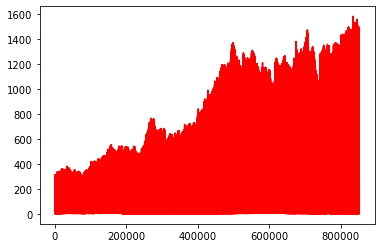

In [49]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
